### The [Michelson Interferometer](https://en.wikipedia.org/wiki/Michelson%E2%80%93Morley_experiment#/media/File:Michelson_morley_experiment_1887.jpg)

#### Objectives (analytical session)
 1. Introduction to AC analysis (as an example we will consider a Fabry-Pérot cavity).
 1. Understand how motion of the mirrors of the Michelson phase-modulates the electric fields.
 1. Introduction to transfer functions, and visualizing them using Bode plots (more on this in the afternoon).
 
#### Homework
 1. Sketch the optical layout of a simple Michelson interferometer.
 1. Write out the field equations for the sketched setup.
 1. Solve for the (DC a.k.a. steady-state) reflectivity and transmissivity of the Michelson.

 
#### References
 1. Lasers by Siegman.
 1. [LRR article](https://link.springer.com/article/10.1007/s41114-016-0002-8), mainly Chapter 5.
 1. You can also find a lot of LIGO related information on the public section of the [DCC](https://dcc.ligo.org/public).

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as scc
from matplotlib.ticker import FormatStrFormatter

In [2]:
# Matplotlib setup
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 10
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.formatter.limits'] = [-2,2]
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.7
plt.rcParams['grid.alpha'] = 0.4
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.style'] = 'normal'
plt.rcParams['font.weight'] = 'extra bold'
plt.rcParams['font.size'] = 16

<div style="background-color:#cceffc;padding:10px;">
    
### Task: Plotting the field and power at the ports of a Michelson

Knowing the amplitude reflectivity and transmissivity of the Michelson, plot the *field amplitudes* and the *power* at the ports of the Michelson as a function of the differential phase. Also plot the powers. Assume that the average arm length, $l_+$, is an integer multiple of the laser wavelength.

#### Question:
Is energy conservation respected?

<span style="color:green"> **Answer**:  </span>
    
<span style="color:green">Yes.</span>

#### Question:
Do the *macroscopic* lengths $l_x$ and $l_y$ play any role in the powers transmitted and reflected by the Michelson in this case where we have monochromatic laser field? What if the laser field has multiple spectral components?

<span style="color:green"> **Answer**:  </span>
    
<span style="color:green">Since we have assumed $l_+$ to be an integer multiple of the carrier wavelength, no. In general, for a single frequency, it is always possible to operate in this state. However, when multiple frequency components are present on the incident field, the quantity $\phi_{\pm}$ will depend on the frequency offset $\omega$ of the sidebands from the carrier frequency ($\phi_{\pm}(\omega) = \phi_-^0 + \frac{\omega l_{\pm}}{c}$). In this way, it is possible to operate the interferometer such that the dark port of the Michelson is truly dark for the carrier frequency, but simultaneously, *maximally* transmits the phase modulation sidebands. This scheme, which is important for the length sensing and control of LIGO control, is called introducing a Schnupp asymmetry.</span>

#### Question
What happens if the arms of the Michelson interferometer have unequal reflectivities? This can sometimes happen despite our best efforts to make the two arms identical. Why could this be detrimental to the GW detection effort?

<span style="color:green"> **Answer**:  </span>
    
<span style="color:green">If the arms have unequal reflectivity (or equivalently, the beamsplitter has T/R values that are not 50%/50%), the destructive interference of the returning beams at the beamsplitter will not be perfect. Consequently, the dark port will not be dark even if the arm lengths are perfectly balanced. In LIGO parlance, this phenomenon belongs under the umbrella term contrast defect (there are other contributing factors). You can see this from the more general expressions for the transmitted and reflected powers:</span>

<span style="color:green"> $$ E_t = \frac{1}{2}e^{-4i\phi_+} \left [ r_y e^{2i\phi_-} - r_x e^{-2i\phi_-} \right ] $$ </span>
<span style="color:green"> $$ E_r = \frac{i}{2}e^{-4i\phi_+} \left [ r_y e^{2i\phi_-} + r_x e^{-2i\phi_-} \right ] $$</span>
<span style="color:green">This effect is undesirable for gravitational wave detection, as we lose the common-mode rejection (CMR) offered by the Michelson topology. In practise, the LIGO interferometers have demonstrated CMR of $\geq 60 \, \mathrm{dB}$.</span>

**Note that there are some variables that are re-assigned in the cells below. So be sure to run the cells in sequence, and if you want to re-generate an old output, be sure to restart the kernel and clear all outputs.**

</div>

In [3]:
# Helper functions
def tMICH(phiD, phiC, rX=1, rY=1):
    '''
    Function to compute the DC transmissivity of a simple Michelson,
    as a function of the common/differential arm phase. 
    
    Parameters:
    ------------
    phiD: array_like
        Differential arm phase [rad]
    phiC: array_like
        Common arm phase [rad]
    rX: complex
        Amplitude reflectivity of the X arm.
        Defaults to 1 (perfectly reflecting).
    rY: complex
        Amplitude reflectivity of the X arm
        Defaults to 1 (perfectly reflecting).
        
    Returns:
    ---------
    Et: array_like
        Field transmitted from the symmetric port to
        the anti-symmetric port.
    '''
    Et = 0.5 * np.exp(-4j*phiC) * (rY*np.exp(2j*phiD) - rX*np.exp(-2j*phiD))
    return(Et)

def rMICH(phiD, phiC, rX=1, rY=1):
    '''
    Function to compute the DC reflectivity of a simple Michelson,
    as a function of the common/differential arm phase. 
    
    Parameters:
    ------------
    phiD: array_like
        Differential arm phase [rad]
    phiC: array_like
        Common arm phase [rad]
    rX: complex
        Amplitude reflectivity of the X arm.
        Defaults to 1 (perfectly reflecting).
    rY: complex
        Amplitude reflectivity of the X arm.
        Defaults to 1 (perfectly reflecting).
        
    Returns:
    ---------
    Er: array_like
        Field reflected from the symmetric port back to
        the symmetric port.
    '''
    Er = 0.5 * 1j * np.exp(-4j*phiC) * (rY*np.exp(2j*phiD) + rX*np.exp(-2j*phiD))
    return(Er)

In [4]:
# Define the arrays
lam = 1064e-9                        # Laser wavelength
lD = np.linspace(-lam/2, lam/2, 201) # Tune differential arm length by +/- 1/2 wavelength
lC = np.zeros(len(lD))               # Make the CARM phase 0 for the carrier 
phiD = 2*np.pi*lD/lam                # Differential arm phase
phiC = 2*np.pi*lC/lam                # Common arm phase
Et = tMICH(phiD, phiC)               # Transmitted field
Er = rMICH(phiD, phiC)               # Reflected field

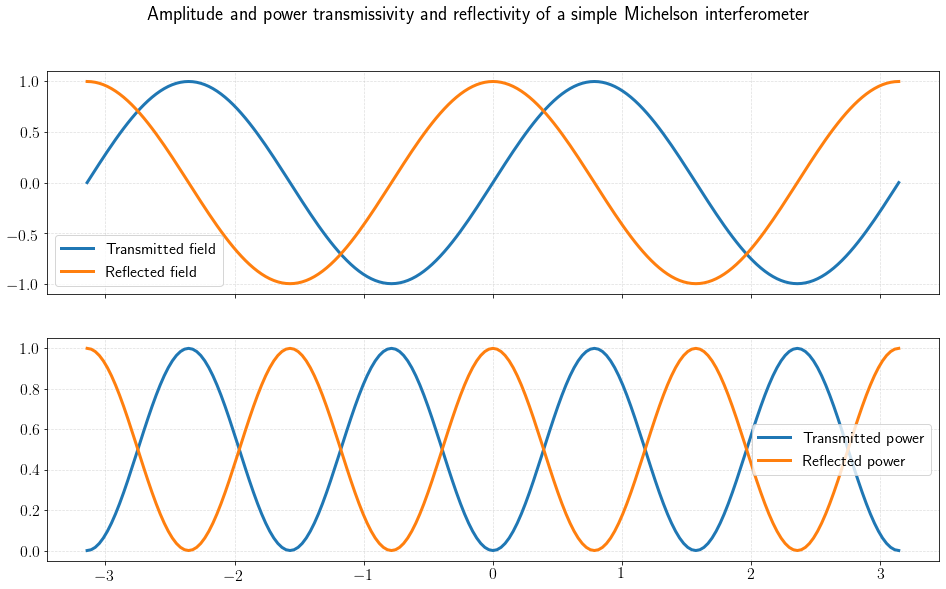

In [5]:
# Make a plot
fig, ax = plt.subplots(2,1,sharex=True, figsize=(16,9))
ax[0].plot(phiD, np.imag(Et), label='Transmitted field')
ax[0].plot(phiD, np.imag(Er), label='Reflected field')
ax[1].plot(phiD, np.abs(Et)**2, label='Transmitted power')
ax[1].plot(phiD, np.abs(Er)**2, label='Reflected power')
# ax[1].set_xlabel('Differential arm phase, $\phi_-$ [rad]')
# ax[0].set_ylabel('Field / $1\, \sqrt{\\mathrm{W}}$ at input')
# ax[1].set_ylabel('Power / $1\, \\mathrm{W}$ at input');
for aa in ax:
    aa.grid(True, which='both')
    aa.legend(loc='best')
fig.suptitle('Amplitude and power transmissivity and reflectivity of a simple Michelson interferometer');

In [7]:
# Check out the Schnupp asymmetry
OmegaRF = 55e6                              # RF sideband frequency
macroLD = 1e-2*np.linspace(0.5,500,201)     # Scan Schnupp asymmetry
dPhi_D = OmegaRF * macroLD / scc.c          # Additional differential phase
phiD_carr = np.zeros(len(macroLD))          # Differential arm phase for carrier (keep the dark port dark)
phiD_SB = phiD_carr + dPhi_D                # Differential arm phase for RF sideband       
Et_carr = tMICH(phiD_carr, phiC)
Er_carr = rMICH(phiD_carr, phiC)
Et_SB = tMICH(phiD_SB, phiC)
Er_SB = tMICH(phiD_SB, phiC)

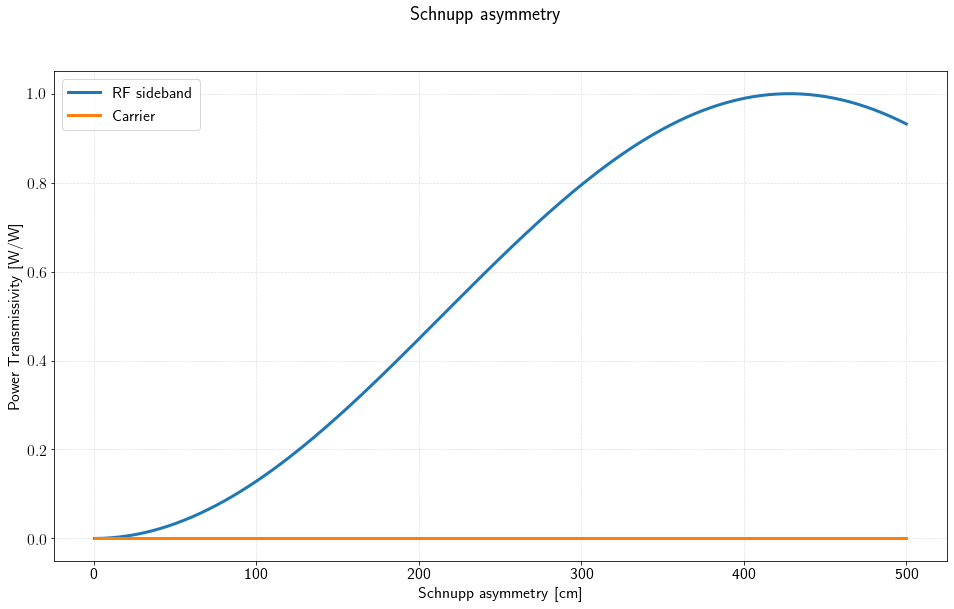

In [8]:
# Make a plot
fig2, ax2 = plt.subplots(1,1,sharex=True, figsize=(16,9))
ax2.plot(macroLD/1e-2, np.abs(Et_SB)**2, label='RF sideband')
ax2.plot(macroLD/1e-2, np.abs(Et_carr)**2, label='Carrier')
ax2.set_xlabel('Schnupp asymmetry [cm]')
ax2.set_ylabel('Power Transmissivity [W/W]')
ax2.legend(loc='best')
ax2.xaxis.set_major_formatter(FormatStrFormatter("%2d"))
fig2.suptitle('Schnupp asymmetry');

In [9]:
# Finally, check out the effect of imbalanced arm reflectivity
dR = np.logspace(-3,-0.5,201)
r_Xarm = np.ones(len(dR))
r_Yarm = r_Xarm - dR
phiD_carr = np.zeros(len(dR))
Et_asy = tMICH(0, 0, rX=r_Xarm, rY=r_Yarm)
Er_asy = rMICH(0, 0, rX=r_Xarm, rY=r_Yarm)

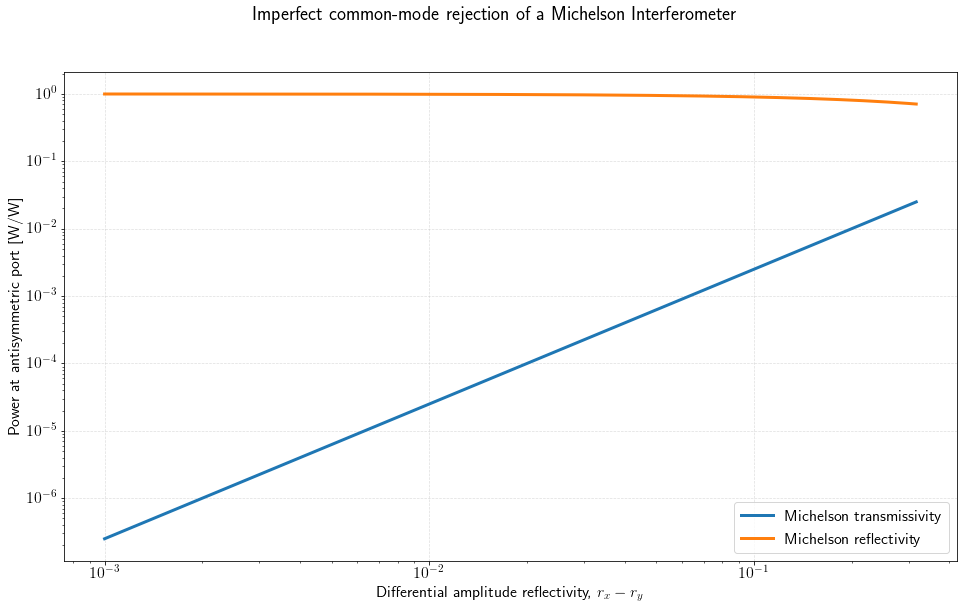

In [10]:
# Make a plot
fig3, ax3 = plt.subplots(1,1, figsize=(16,9))
ax3.loglog(dR, np.abs(Et_asy)**2, label='Michelson transmissivity')
ax3.loglog(dR, np.abs(Er_asy)**2, label='Michelson reflectivity')
ax3.legend(loc='best')
ax3.set_xlabel('Differential amplitude reflectivity, $r_x - r_y$');
ax3.set_ylabel('Power at antisymmetric port [W/W]')
fig3.suptitle('Imperfect common-mode rejection of a Michelson Interferometer');

### AC analysis

We saw yesterday that a Fabry-Pérot cavity has a *response*. From the DC transmissivity of the cavity that we derived on Day 1, how can we understand why this is so?

The Laplace notation is convenient for deriving the cavity pole equation. This is another way of arriving at the result, albeit with more assumptions.

In handling the algebraic cavity reflectivity equations, one often ends up with an expression that looks like
$$S \propto \frac{1}{1-re^{\frac{2i\omega L}{c}}} = \frac{1}{1-re^{i \frac{\omega}{\omega_1}\ln r}}, \ \omega_1 \equiv \frac{c}{2L}|\ln (r)|, \quad r \equiv r_1 r_2 \\
 = \frac{1}{1-re^{\ln(r^{i\frac{\omega}{\omega_1}})}} \ \because i \frac{\omega}{\omega_1} \ln (r) = \ln(r^{i\frac{\omega}{\omega_1}}) \\
 = \frac{1}{1-r^{1+i\frac{\omega}{\omega_1}}}.$$
Up till this point, the manipulation is exact, and no approximations have been invoked yet. Now in the limit $r \rightarrow 1$ as is usually the case,
$$ S \propto \frac{1}{1 - (1-\delta r)^{1+i\frac{\omega}{\omega_1}}}, \ \delta r \ll 1 \\
\approx \frac{1}{1 - 1 + (1+i\frac{\omega}{\omega_1}) \delta r} \ \because (1-\delta r)^n \approx 1 - n \delta r,  \delta r \ll 1 \\
\propto \frac{1}{1-r} \frac{1}{1+i\frac{\omega}{\omega_1}}.$$
The key point here is that we are expanding the quantity $(1-\delta r)^{1+i\frac{\omega}{\omega_1}}$ in the limit $\delta r \ll 1$, and are not really expanding in a power series in $\omega$. But there are other ways to arrive at the same result. All roads lead to Rome.

<div style="background-color:#cceffc;padding:10px;">
    
### Task: Visualizing transfer functions
The transfer function derived above is a *complex number*, relating the input and reflected fields from a Fabry-Pérot cavity. Connect the expression above with the reflectivity for the FP cavity you derived on Day 1. Plot the magnitude and phase of the *approximate* relation derived above. Use the following parameters:

$T_1 = T_2 = 1000 \, \mathrm{ppm}, L = 26 \, \mathrm{m}, \Omega_{\mathrm{RF}} = 11 \mathrm{MHz}$

#### Question:
What is the significance of the parameter $\omega_1$?

#### Question:
We could repeat the analysis for the transmitted field. What is the attenuation of the cavity for the sideband field at $\Omega_{\mathrm{RF}}$ relative to the carrier field?

</div>

In [11]:
# Matplotlib setup
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 10
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.formatter.limits'] = [-2,2]
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.7
plt.rcParams['grid.alpha'] = 0.4
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.style'] = 'normal'
plt.rcParams['font.weight'] = 'extra bold'
plt.rcParams['font.size'] = 16

In [12]:
def FPrefl(T1, T2, L, omega):
    t1 = np.sqrt(T1)
    t2 = np.sqrt(T2)
    r1 = np.sqrt(1-T1)
    r2 = np.sqrt(1-T2)
    r = r1*r2
    omega1 = scc.c / 2 / L
    omega1*= np.abs(np.log(r))
    print('Corner frequency is {} Hz'.format(np.round(omega1/2/np.pi, 3)))
    return((1/(1-r))*(1/(1+ 1j*omega/omega1)))

omega = np.logspace(1,5,801)
S = FPrefl(1000e-6, 1000e-6, 26, omega)

Corner frequency is 918.025 Hz


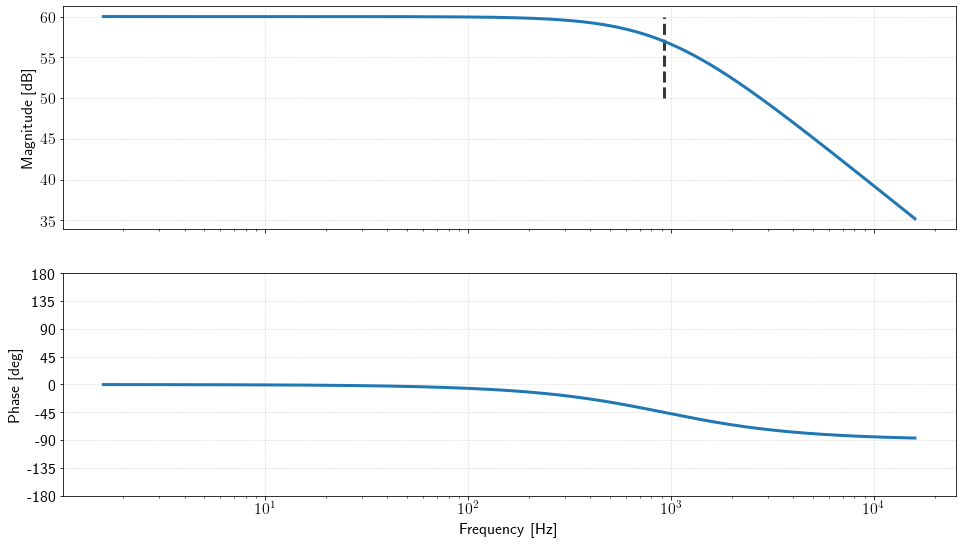

In [13]:
fig, ax = plt.subplots(2,1,sharex=True, figsize=(16,9))
ax[0].semilogx(omega / 2 / np.pi, 20*np.log10(np.abs(S)))
ax[1].semilogx(omega / 2 / np.pi, np.angle(S, deg=True))
ax[0].vlines(918,50,60,linestyle='--', color='xkcd:charcoal')
ax[1].set_xlabel('Frequency [Hz]')
ax[0].set_ylabel('Magnitude [dB]')
ax[1].set_ylabel('Phase [deg]')
ax[1].set_ylim([-180,180])
ax[1].set_yticks(np.linspace(-180,180,9));
ax[1].yaxis.set_major_formatter(FormatStrFormatter("%2d"))